### $\color{royalblue}{\text{ Treća vježba iz numeričkih metoda u astronomiji (NMA), datum: 31.10.2024.}} $

### $\color{magenta}{\text{1. KONAČNE RAZLIKE.}} $

Pravimo niz nasumičnih vrijednosti.

In [1]:
import numpy as np
import  math

In [3]:
a=np.round(np.random.random(10)*100)

print('a= ',a)

a=  [20. 93. 56. 89. 99. 35. 44. 43. 67. 15.]


### Ručni metod: pravimo niz nizova nula.

In [4]:
razlike=[]
red=len(a)-1

for i in range(0,red):
    razlike.append(np.zeros(red-i))
    
razlike

[array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0.]),
 array([0.])]

### Popunjavamo nizove konačnim razlikama.

In [5]:
a1=a    

for i in range(0,red):
    for j in range(0,red-i):
        razlike[i][j]=a1[j+1]-a1[j]
        
    a1=razlike[i]
    
razlike

[array([ 73., -37.,  33.,  10., -64.,   9.,  -1.,  24., -52.]),
 array([-110.,   70.,  -23.,  -74.,   73.,  -10.,   25.,  -76.]),
 array([ 180.,  -93.,  -51.,  147.,  -83.,   35., -101.]),
 array([-273.,   42.,  198., -230.,  118., -136.]),
 array([ 315.,  156., -428.,  348., -254.]),
 array([-159., -584.,  776., -602.]),
 array([ -425.,  1360., -1378.]),
 array([ 1785., -2738.]),
 array([-4523.])]

### Popunjavamo nizove konačnim razlikama korišćenjem metode $np.diff$.

In [6]:
a1=a
for i in range(len(razlike)):
    razlike[i]=np.diff(a1)
    a1=razlike[i]
    
razlike

[array([ 73., -37.,  33.,  10., -64.,   9.,  -1.,  24., -52.]),
 array([-110.,   70.,  -23.,  -74.,   73.,  -10.,   25.,  -76.]),
 array([ 180.,  -93.,  -51.,  147.,  -83.,   35., -101.]),
 array([-273.,   42.,  198., -230.,  118., -136.]),
 array([ 315.,  156., -428.,  348., -254.]),
 array([-159., -584.,  776., -602.]),
 array([ -425.,  1360., -1378.]),
 array([ 1785., -2738.]),
 array([-4523.])]

### Silazne razlike.

In [9]:
silazne_razlike=[]
for i in range(len(razlike)):
    silazne_razlike.append(razlike[i][0])

silazne_razlike

[73.0, -110.0, 180.0, -273.0, 315.0, -159.0, -425.0, 1785.0, -4523.0]

### Uzlazne razlike.

In [7]:
uzlazne_razlike=[]
for i in range(len(razlike)):
    uzlazne_razlike.append(razlike[i][-1])
    
uzlazne_razlike

[-52.0, -76.0, -101.0, -136.0, -254.0, -602.0, -1378.0, -2738.0, -4523.0]

### Središnje razlike.

In [8]:
sredisnje_razlike=[]

for i in range(len(razlike)):
    if np.mod(len(razlike[i]),2)==1:
        i1=int(len(razlike[i])/2)
        sredisnje_razlike.append(razlike[i][i1])
    else:
        i1=int(len(razlike[i])/2-1)
        sredisnje_razlike.append((razlike[i][i1]+razlike[i][i1+1])/2)
        
sredisnje_razlike

[-64.0, -0.5, 147.0, -16.0, -428.0, 96.0, 1360.0, -476.5, -4523.0]

### $\color{magenta}{\text{2. INTERPOLACIONI POLINOMI.}}$
Malo drugačiji pogled na razlike. Idemo od silaznih, preko uzlaznih, pa na središnje.

In [18]:
def silazne_razlike(y):
    red=len(y)-1 # red interpolacionog polinoma (toliko i redova razlika imamo)
    razlike=[]
    for i in range(0,red):
        razlike.append(np.zeros(red-i))
        
    y1=y    
    for i in range(0,red):
        for j in range(0,red-i):
            razlike[i][j]=y1[j+1]-y1[j]
            
        y1=razlike[i]

    silazne=[]    
    for i in range(0,red):
        silazne.append(razlike[i][0])

    return silazne

In [19]:
def uzlazne_razlike(y):
    
    red=len(y)-1 # red interpolacionog polinoma (toliko i redova razlika imamo)
    razlike=[]
    for i in range(0,red):
        razlike.append(np.zeros(red-i))
        
    y1=y    
    for i in range(0,red):
        for j in range(0,red-i):
            razlike[i][j]=y1[j+1]-y1[j]
            
        y1=razlike[i]

    uzlazne=[]
  
    for i in range(0,red):
        uzlazne.append(razlike[i][len(razlike[i])-1])
        
    return  uzlazne

In [20]:
def sredisnje_razlike(y):

    red=len(y)-1 # red interpolacionog polinoma (toliko i redova razlika imamo)
    razlike=[]
    for i in range(0,red):
        razlike.append(np.zeros(red-i))
        
    y1=y    
    for i in range(0,red):
        for j in range(0,red-i):
            razlike[i][j]=y1[j+1]-y1[j]
            
        y1=razlike[i]

    sredisnje=[]
    
    
    # Za kasnije...
    
    for i in range(0,red):
        
        if red % 2 == 0: # neparan broj čvorova (paran red polinoma) - Stirling
            if i % 2 !=0:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.))-1])
            else:
                sredisnje.append(np.mean([razlike[i][int(len(razlike[i])/2)-1], 
                                          razlike[i][int(len(razlike[i])/2)]]))
                
        else: # paran broj čvorova (neparan red polinoma) - Besel
            if i % 2 !=0:
                sredisnje.append(np.mean([razlike[i][int(int(len(razlike[i])/2))-1], 
                                          razlike[i][int(int(len(razlike[i])/2))]]))
            else:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.))-1])       

    return sredisnje

### 2.1. a) Njutnov polinom prve vrste (sa silaznim razlikama) za interpolaciju na početku tablice.
## $P(x)=y_0+ \frac{t}{1!} \Delta y_0 + \frac{t(t-1)}{2!}\Delta^2 y_0 + ... + \frac{t(t-1) ... (t-n+1)}{n!} \Delta^n y_0$

## $t=\frac{x-x_0}{h}$ 

h - ekvidistantni korak
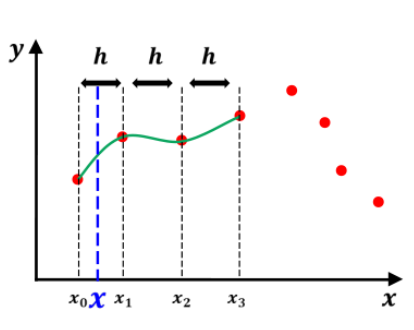



In [22]:
def njutn_1(x,y,x0):
    
#==============================================================================
#     INTERPOLIRA NJUTNOVIM POLINOMOM 1. VRSTE
#==============================================================================
#     x,y - čvorovi interpolacije
#     x0 - argumenti za koje se vrši interpolacija
#==============================================================================

    silazne=silazne_razlike(y)
    h=x[1]-x[0] #korak
    P=y[0]
    cinilac=1
    for i in range(0,len(y)-1):
        cinilac=cinilac*(x0-x[i])
        P=P+silazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

### 2.1. b) Njutnov polinom druge vrste (sa uzlaznim razlikama) za interpolaciju na početku tablice.

Prednosti: Jednostavnije je dodati tačke jer se interpolaciona formula lako proširuje. Važi i za a).

Mane: U slučaju nejednakih razmaka između tačaka, računanje može postati kompleksnije. Važi i za a).

## $P(x)=y_n+ \frac{t}{1!} \Delta y_{n-1} + \frac{t(t+1)}{2!}\Delta^2 y_{n-2} + ... + \frac{t(t+1) ... (t+n-1)}{n!} \Delta^n y_0$
    
## $t=\frac{x-x_n}{h}$

h - ekvidistantni korak

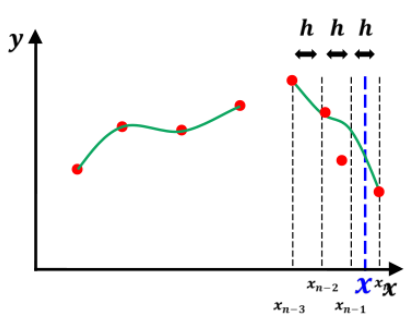

In [23]:
def njutn_2(x,y,x0):
    
#==============================================================================
#     INTERPOLIRA NJUTNOVIM POLINOMOM 2. VRSTE
#==============================================================================
#     x,y - čvorovi interpolacije
#     m  
#==============================================================================

    uzlazne=uzlazne_razlike(y)
    h=x[1]-x[0] #korak
    P=y[-1]
    cinilac=1
    for i in range(0,len(y)-1):
        cinilac=cinilac*(x0-x[-1-i])
        P=P+uzlazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

### 2.2. Lagranžov polinom, za neekvidistantne argumente.

Prednosti: Ne zahtijeva rješavanje sistema jednačina.

Mane: Za veliki broj tačaka, polinom može postati previše kompleksan za računanje.

In [ ]:
def lagranz(x,y,x0):
    
#==============================================================================
#     INTERPOLIRA LAGRANZOVIM POLINOMOM
#==============================================================================
#     x,y - čvorovi interpolacije (np.array)
#     x0 - argumenti za koje se vrši interpolacija (u obliku niza)
#==============================================================================

    P=[]
    
    for k in range(0,len(x0)):
        xi=x0[k]
        PP=0
        for i in range(0, len(x)):
            z=np.delete(x,i)
            imenilac=xi-z
            delilac=x[i]-z

            I=1
            D=1
            
            for j in range(0,len(imenilac)):
                I=I*imenilac[j]
                D=D*delilac[j]
                
            
            PP=PP+I/D*y[i]
            
        P.append(PP)
        
    return P

### 2.3. Stirlingov interpolacioni polinom.

Prednosti: Dobar za glatku interpolaciju kod podataka sa simetrično raspoređenim tačkama.

Mane: Manje precizan kod asimetričnih rasporeda tačaka ili u slučajevima velikih oscilacija između vrijednosti.

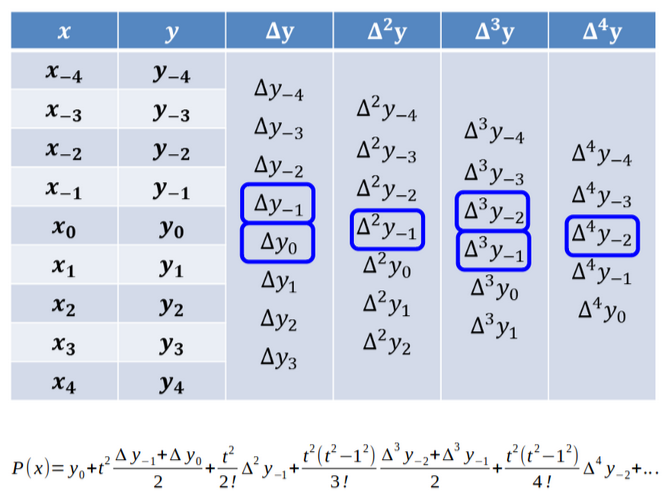

In [2]:
def stirling(x,y,x0,red):
    
#==============================================================================
#   INTERPOLIRA STIRLINGOVIM POLINOMOM
#==============================================================================
#     x,y - čvorovi interpolacije
#     x0 - argumenti za koje se vrši interpolacija
#     red polinoma kojim se vrši interpolacija    
#==============================================================================
    
    if np.mod(red,2)!=0:
        print('Stirlingov polinom mora biti parnog reda')
        exit()
     
    h=x[1]-x[0] #korak
    # izbor čvorova za interpolaciju
    indeks=np.argwhere(x<x0)[-1][0] # indeks najvećeg elementa koji je manji od x0

    q=(x0-x[indeks])/h
    if q>=0.5:
        x=x[indeks-int(red/2)+1:indeks+int(red/2)+2]
        y=y[indeks-int(red/2)+1:indeks+int(red/2)+2]
    else:
        x=x[indeks-int(red/2):indeks+int(red/2)+1]
        y=y[indeks-int(red/2):indeks+int(red/2)+1]
    
    sredisnje=sredisnje_razlike(y)

    
    P=y[int(np.floor(len(x)/2))] 
    q=(x0-x[int(np.floor(len(x)/2))])/h
    q_parno=1
        
    for i in range(1,int((len(x)+1)/2)):
        q_parno=q_parno*(q**2-(i-1)**2)
            
        if i==1:
            q_neparno=q
        else:
            q_neparno=q_neparno*(q**2-(i-1)**2)
                      
        P=P+q_neparno/math.factorial(2*i-1)*sredisnje[2*i-2]
        P=P+q_parno/math.factorial(2*i)*sredisnje[2*i-1]
            
    return P,x,y

### 2.4. Beselov interpolacioni polinom.

Prednosti: Dobar za ravnomjerno raspoređene podatke u slučajevima kada se traži vrijednost između dvije centralne tačke.

Mane: Složeniji za primjenu u nesimetričnim tačkama ili kada su razmaci nejednaki.

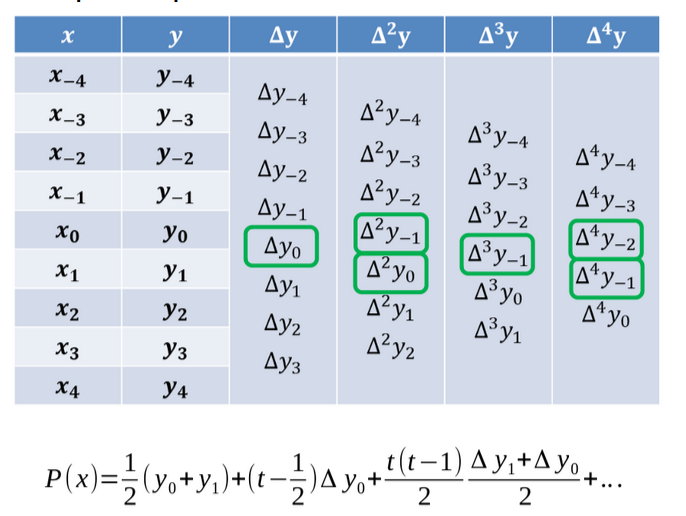

In [4]:
def besel(x,y,x0,red):
    
#==============================================================================
#   INTERPOLIRA BESELOVIM POLINOMOM
#==============================================================================
#     x,y - čvorovi interpolacije
#     x0 - argumenti za koje se vrši interpolacija
#     red polinoma kojim se vrši interpolacija    
#==============================================================================

    if np.mod(red,2)==0:
        print('Beselov polinom mora biti neparnog reda')
        exit()
        
    h=x[1]-x[0] #korak
    # izbor čvorova za interpolaciju
    indeks=np.argwhere(x<x0)[-1][0] # indeks najvećeg elementa koji je manji od x0

    x=x[indeks-int(red/2):indeks+int(red/2)+2]
    y=y[indeks-int(red/2):indeks+int(red/2)+2]

    sredisnje=sredisnje_razlike(y)

    P=0
    sredisnje=[(y[int(len(y)/2)-1]+y[int(len(y)/2)])/2.]+sredisnje
    q=(x0-x[int(len(x)/2)-1])/h
    qq=1
    
   
    for i in range (0,int(len(x)/2)):

        if i==0: # razlike neparnog reda posto pajton krece od 0
            q_parno=1
            q_neparno=q-0.5
        elif i==1:
            q_parno=q*(q-1)
            q_neparno=q*(q-1)*(q-0.5)
        else:   
            qq=qq*(q**2-(i-1)**2)
            q_parno=q*(q-i)*qq
            q_neparno=q*(q-i)*(q-0.5)*qq
            
        P=P+q_parno/math.factorial(2*i)*sredisnje[2*i]
        P=P+q_neparno/math.factorial(2*i+1)*sredisnje[2*i+1]

    return P,x,y

### $\color{magenta}{\text{3. INTERPOLACIONI POLINOMI U PRIMJENI.}}$

In [1]:
import matplotlib.pyplot as plt
import ipympl

%run Interpolacioni_polinomi.ipynb 

t,x,y,z=np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)
print(len(t),len(x),len(y),len(z))

# Uzimamo svaki deseti element iz niza

t=t[0::10]
x=x[0::10]
y=y[0::10]
z=z[0::10]

r=np.sqrt(x**2+y**2+z**2)

print(len(t))

537 537 537 537
54


### 3. a) Njutn I:

9.41090483577845


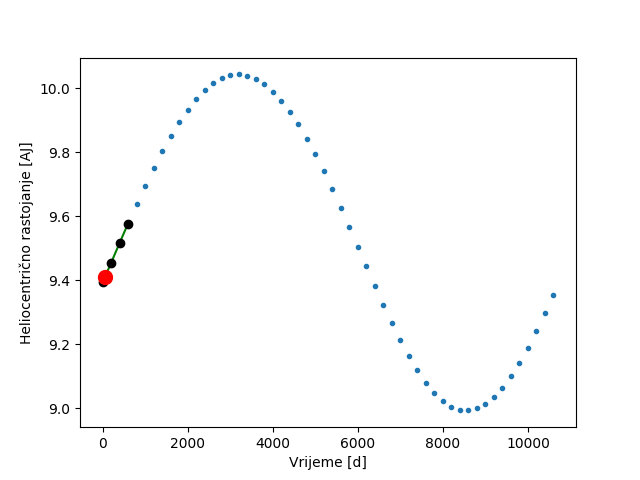

In [3]:
t0=59.543

red=3
indeks=np.argwhere(t<t0).flatten()[-1]

r0=njutn_1(t[indeks:indeks+red+1],r[indeks:indeks+red+1],t0)

print(r0)
xx=np.linspace(t[indeks], t[indeks+red],100)
yy=njutn_1(t[indeks:indeks+red+1],r[indeks:indeks+red+1],xx)

plt.plot(xx,yy,'g')

plt.plot(t,r,'.')
plt.plot(t[indeks:indeks+red+1],r[indeks:indeks+red+1],'ok')
plt.plot(t0,r0,'or',markersize=10)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.show()

### 3. b) Njutn II:

9.336482974122788


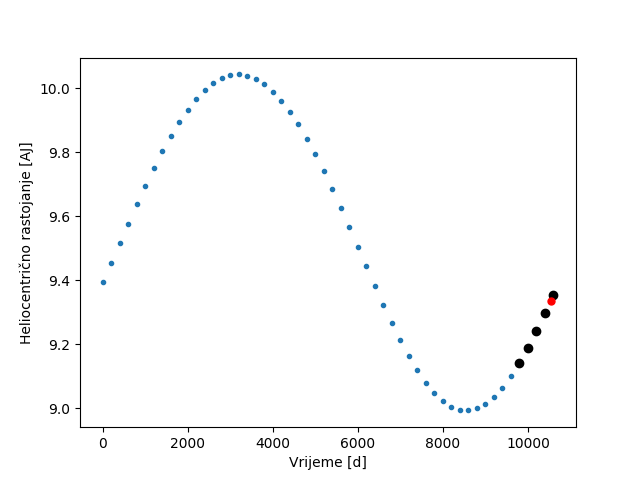

In [4]:
t0=10536.252

red=4
indeks=np.argwhere(t>t0).flatten()[0]

r0=njutn_2(t[indeks-red:indeks+1],r[indeks-red:indeks+1],t0)
print(r0)

plt.plot(t,r,'.')
plt.plot(t[indeks-red:indeks+1],r[indeks-red:indeks+1],'ok')
plt.plot(t0,r0,'or',markersize=5)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.show()

### 3. c) Lagranž:

[9.10549657968802]


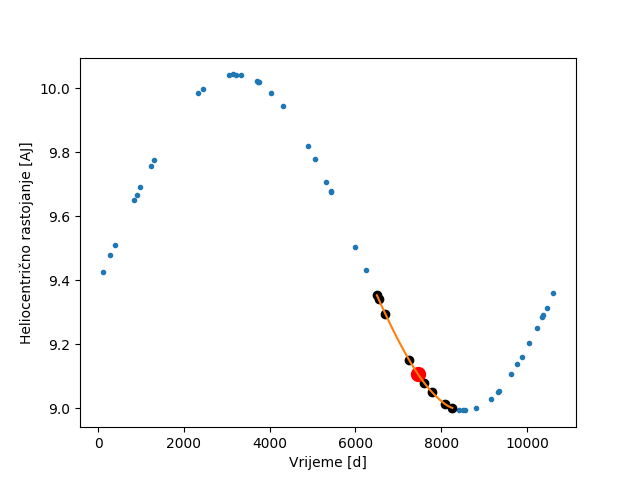

In [5]:
import random
t,x,y,z=np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

izbor_cvorova=random.sample(range(len(t)), 50) # biramo nasumično 50 čvorova
izbor_cvorova.sort()
t=t[izbor_cvorova]
x=x[izbor_cvorova]
y=y[izbor_cvorova]
z=z[izbor_cvorova]

r=np.sqrt(x**2+y**2+z**2)

t0=7463.56
red=7
indeks=(np.argwhere(t<t0)).flatten()[-1]

q=(t0-t[indeks])/(t[indeks+1]-t[indeks])

if np.mod(red,2)==1: # paran broj čvorova
    i1=indeks-int((red+1)/2)+1
    i2=indeks+int((red+1)/2)
else:
    if q>=0.5:
        i1=indeks-int((red+1)/2)+1
        i2=indeks+int((red+1)/2)+1
    else:
        i1=indeks-int((red+1)/2)
        i2=indeks+int((red+1)/2)
        

plt.plot(t,r,'.') # svi čvorovi
plt.plot(t[i1:i2+1],r[i1:i2+1],'ok') # samo oni čvorovi koji su korišćeni za interpolaciju

# interpolacija

r0=lagranz(t[i1:i2+1],r[i1:i2+1],[t0])
print(r0)

plt.plot(t0,r0,'or',markersize=10)

# interpolacija na intervalu [i1, i2]

tt=np.linspace(t[i1],t[i2],100)
rr0=lagranz(t[i1:i2+1],r[i1:i2+1],tt)

plt.plot(tt,rr0)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.show()

### 3. d) Stirling:

10.03868409315506


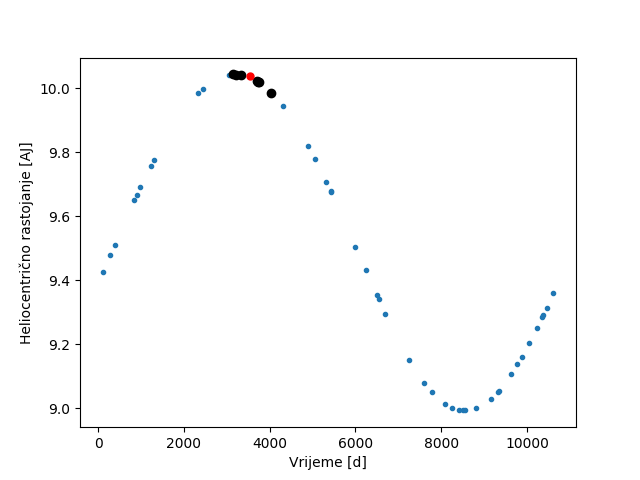

In [6]:
t0=3550.543
r0,x0,y0=stirling(t,r,t0,red=6)
print(r0)

plt.plot(t,r,'.')
plt.plot(x0,y0,'ok')

plt.plot(t0,r0,'or',markersize=5)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.show()

### 3. e) Besel:

Beselov polinom mora biti neparnog reda
9.73080142045848


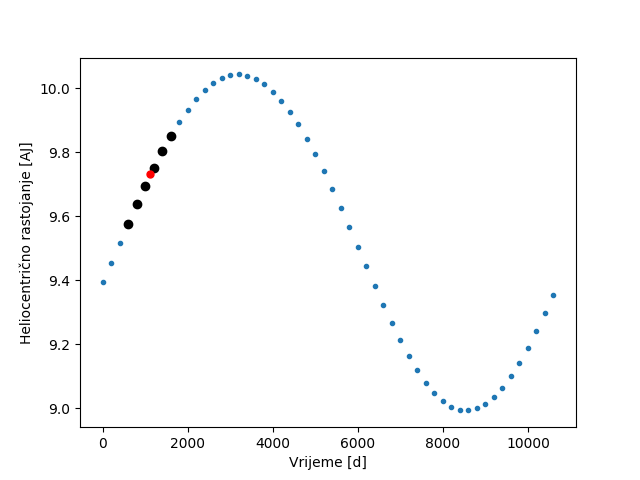

In [3]:
t0 = 1126.543
r0,x0,y0=besel(t,r,t0, red=4)
print(r0)

plt.plot(t,r,'.')
plt.plot(x0,y0,'ok')
plt.plot(t0,r0,'or',markersize=5)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.show()

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 1. Data je mreža nadmorskih visina na površini Marsa. Koraci između tačaka po latitudi i longitudi su uniformni, 
#### pa je mreža ravnomjerno raspoređena. Odrediti nadmorsku visinu za proizvoljnu longitudu na Marsu
#### koristeći proizvoljni interpolacioni polinom (razmisliti šta je pametno). Pored longitude, omogućiti i interpolaciju 
#### nadmorske visine po proizvoljnim tačkama duž latitude sa definisanim korakom. Rezultate prikazati grafički:
#### interpoliranu  nadmorsku visinu duž određenih latituda i longituda. Fajl koji je potreban je 'topografija.dat'.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

### $\color{green}{\text{RJEŠENJA:}} $